In [64]:
import os
import cv2 
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import model_from_json
from PIL import Image
%matplotlib inline

In [65]:
# ----- LOAD SAVED MODEL -----
json_file = open('model.json', 'r')     
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk.")

Loaded model from disk.


In [66]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 12561 images belonging to 17 classes.


*select the image which you want to predict similar images*

In [67]:
import numpy as np
from keras.preprocessing import image
cwd = os.getcwd()
img_path="E:\\fashion rec\\FashionVCdata\\top\\64789688.jpg"
#img_path="E:\\fashion rec\\dataset_category_test\\floral\\851506797.jpg"
test_image = image.load_img(img_path, target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 102ms/step


{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [68]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [69]:
index = np.where(result[0] >0)[0][0]
index

9

plain


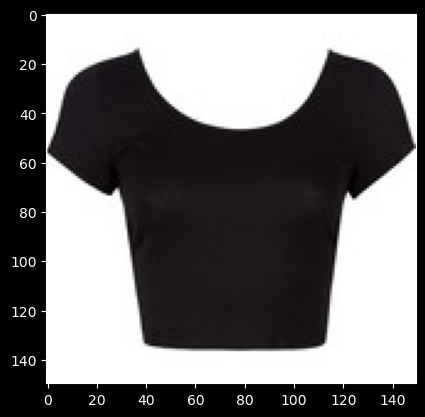

In [70]:
test_img=Image.open(img_path)
plt.imshow(test_img)
predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
print(predicted_category)